In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 


In [4]:
wines_df = pd.read_csv('wines_final.csv')
wines_df.head()

,Unnamed: 0,alcohol_percent,country,discount_price,grape_variety,price,producer,product_name,wine_color,year
0,0,14.000000,Greece,45.63,Agiorgitiko,49.6,Nemeion,Igemon (1741),Red,2007
1,1,13.238695,Greece,11.13,Malagouzia,12.1,Karadimos,Malagouzia Drios Karadimou (2915),White,2017
2,2,14.000000,Greece,25.12,Syrah,27.3,Avantis,Freedom (3929),Red,2016
3,3,13.500000,Greece,13.95,Cabernet Franc,15.5,Porto Carras,Chateau Porto Carras (472),Red,2010
4,4,13.500000,Greece,8.55,Athiri,9.5,Porto Carras,Melissanthi (467),White,2018


In [7]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
Unnamed: 0         470 non-null int64
alcohol_percent    470 non-null float64
country            470 non-null object
discount_price     470 non-null float64
grape_variety      470 non-null object
price              470 non-null float64
producer           470 non-null object
product_name       470 non-null object
wine_color         470 non-null object
year               470 non-null int64
discount_diff      470 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 40.5+ KB


In [26]:
wines_df.describe(include='all')

,Unnamed: 0,alcohol_percent,country,discount_price,grape_variety,price,producer,product_name,wine_color,year,discount_diff
count,470.000000,470.000000,470,470.000000,470,470.000000,470,470,470,470.000000,470.000000
unique,NaN,NaN,14,NaN,69,NaN,67,470,4,NaN,NaN
top,NaN,NaN,Greece,NaN,Sauvignon Blanc,NaN,Unkwon Producer,Rioja Reserva Viña Ardanza 2009 La Rioja Alta,Red,NaN,NaN
freq,NaN,NaN,290,NaN,44,NaN,180,1,267,NaN,NaN
mean,123.436170,13.238695,NaN,13.885979,NaN,15.688915,NaN,NaN,NaN,2015.529787,1.802936
std,78.012978,0.889524,NaN,9.185722,NaN,9.921796,NaN,NaN,NaN,3.257624,1.172236
min,0.000000,9.000000,NaN,4.770000,NaN,5.300000,NaN,NaN,NaN,2000.000000,0.480000
25%,58.250000,13.000000,NaN,8.732500,NaN,9.990000,NaN,NaN,NaN,2015.000000,1.000000
50%,117.000000,13.238695,NaN,10.990000,NaN,12.990000,NaN,NaN,NaN,2017.000000,1.415000
75%,175.750000,14.000000,NaN,15.972500,NaN,17.600000,NaN,NaN,NaN,2018.000000,2.000000


In [6]:
wines_df["discount_diff"]=wines_df.price - wines_df.discount_price

wines_df.head()

## Frecuencia del procentaje de alcohol 

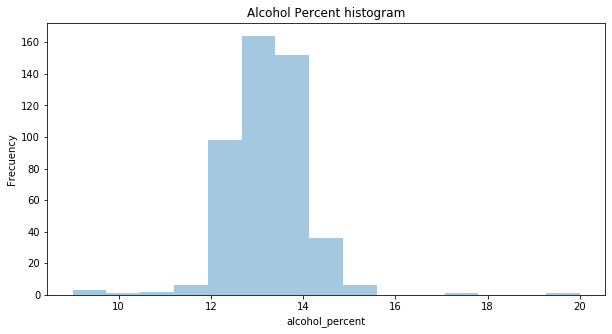

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(wines_df.alcohol_percent,kde=False,bins=15)
plt.title("Alcohol Percent histogram")
plt.ylabel('Frecuency');


En la figura de arriba podemos observar que la mayoria de los vinos (casi 160 del total) 
tienen entre 12 y 14 % de alcohol 

## Frecuencia del precio 

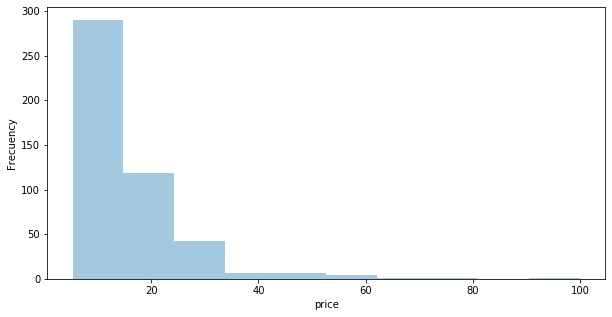

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(wines_df.price,kde=False,bins=10)
plt.ylabel('Frecuency');


En la figura de arriba podemos observar que la mayoria de los vinos (casi 400 del total) 
tienen un costo entre 10 y 20 Euros, siendo unos pocos los que son mayores a 80 euros

## Frecuencia de vinos con descuento

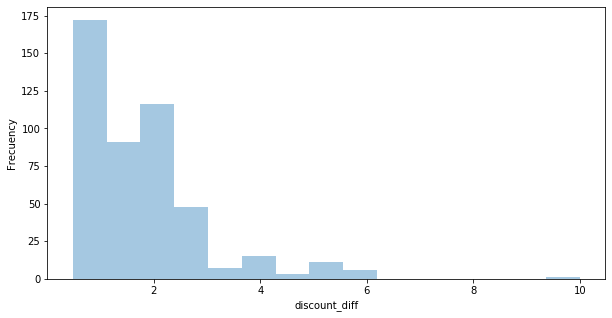

In [140]:
plt.figure(figsize=(10,5))
sns.distplot(wines_df.discount_diff,kde=False,bins=15)
plt.ylabel('Frecuency');

De la figura anterior se puede observar que una gran cantidad de vinos tienen descuents entre 1-2 Euros 

## Promedio de porcentaje de alcohol por tipo de Uva

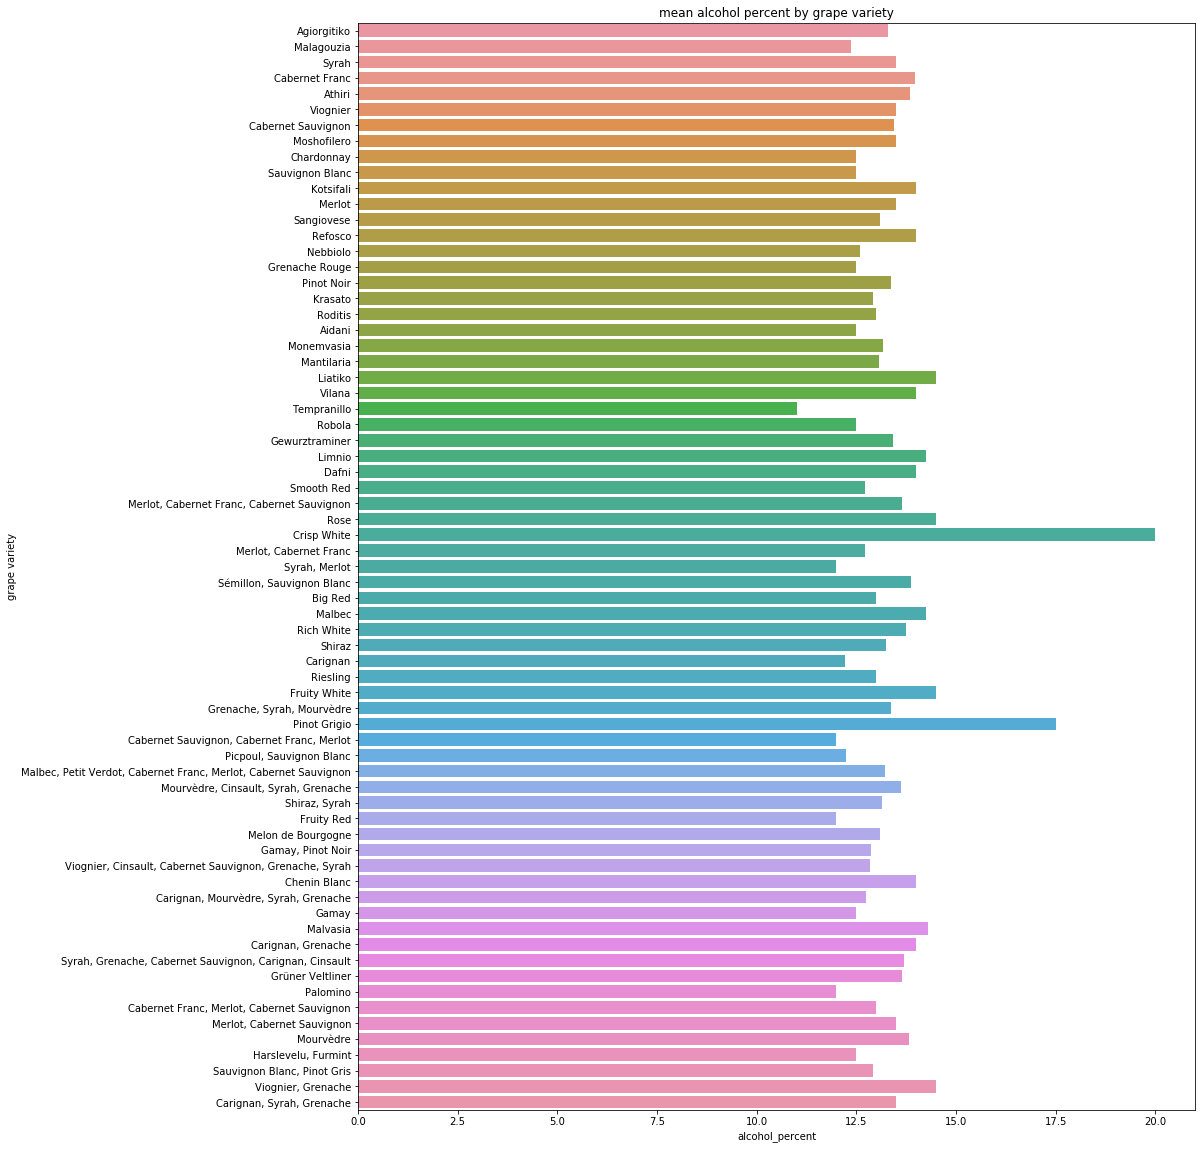

In [141]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['grape_variety']).alcohol_percent.mean(),y=wines_df.grape_variety.unique() ,orient='h')
plt.ylabel("grape variety")
plt.title("mean alcohol percent by grape variety");

De la figura anterior se puede observar que dependiendo del tipo de Uva se tiene diferente porcentaje de alcohol 
Por ejemplo, la variedad Crisp White tiene mayor porcentaje de alcohol que demás variedes de Uva

## Promedio del precio por variedad de Uva

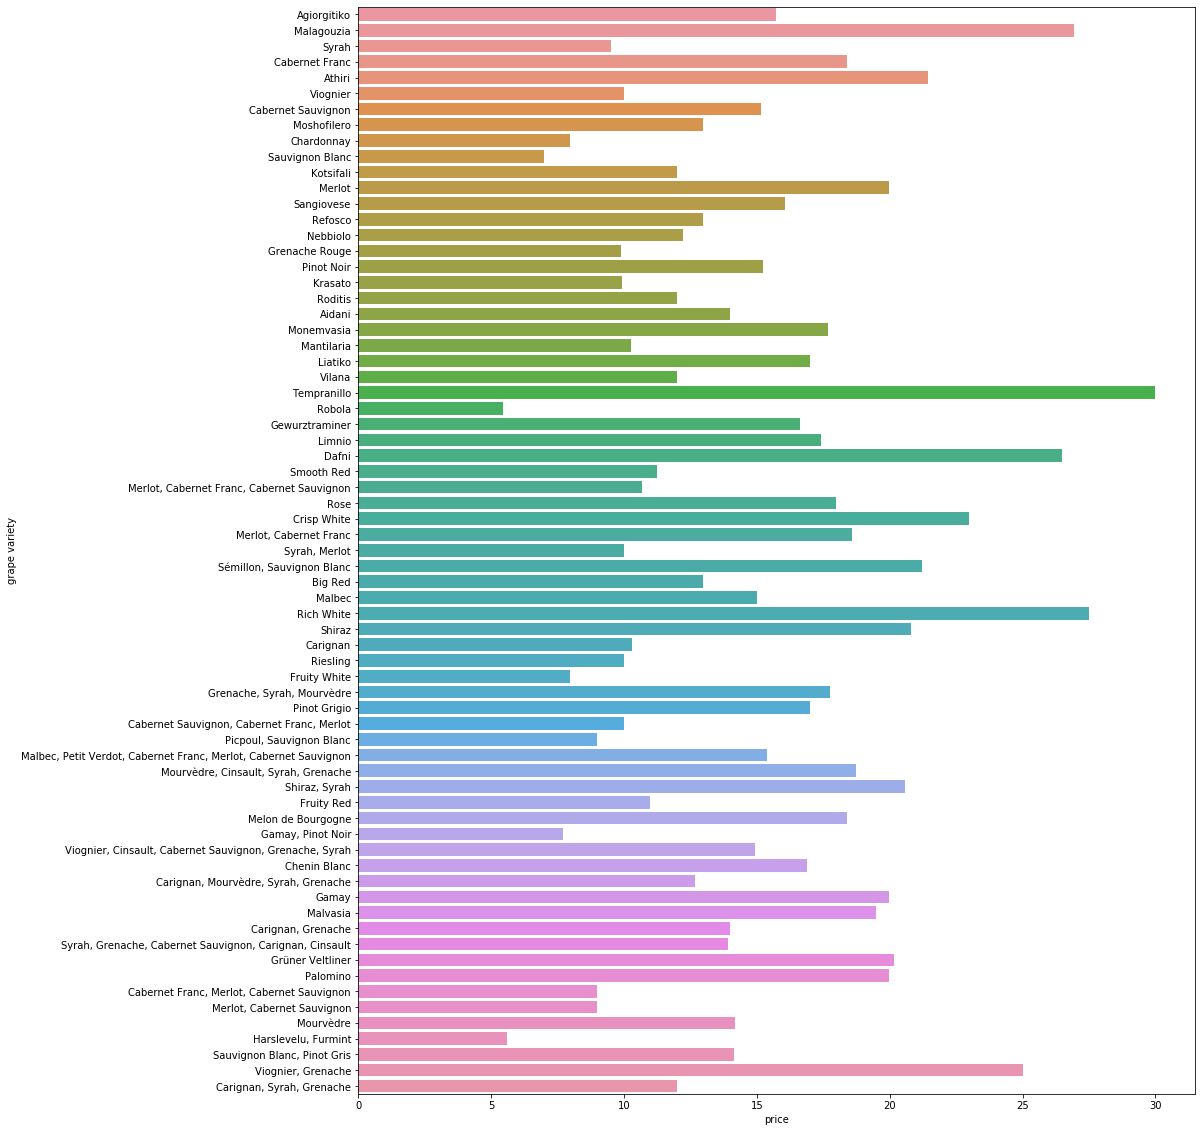

In [38]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['grape_variety']).price.mean(),y=wines_df.grape_variety.unique() ,orient='h')
plt.ylabel("grape variety");


En la figura anterior podemos observar el precio promedio por variedad de Uva del vino
De lo anterior se deduce que la variedad tempranillo es la que tiene mayor precio
En cambio las variedades con menor precio son Robola y Harslevelu, Forming

## Descuento promedio por variedad de Uva 

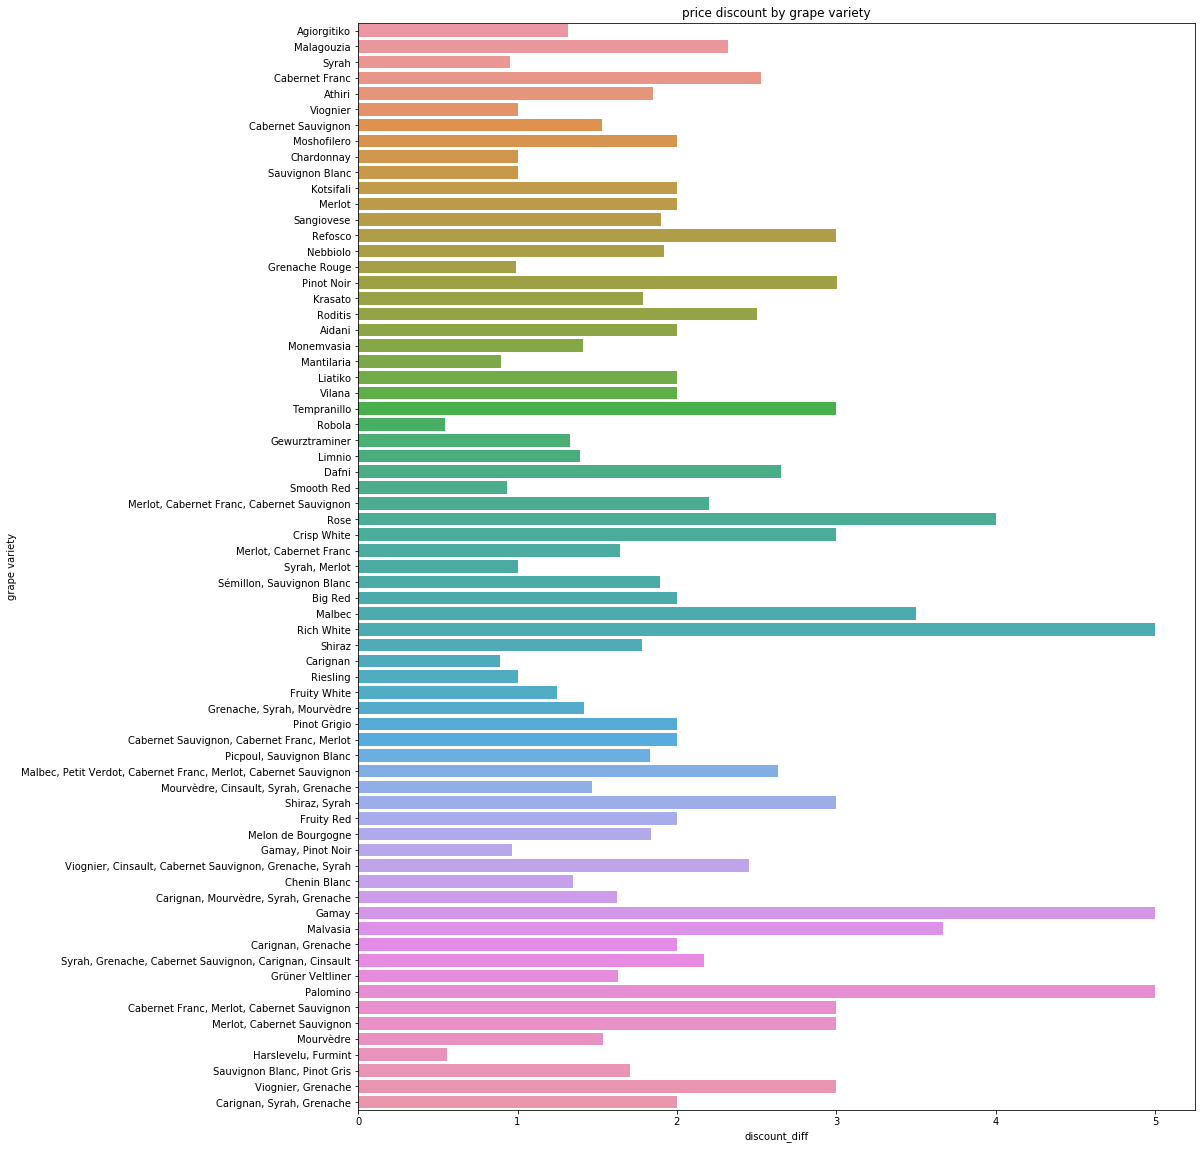

In [51]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['grape_variety']).discount_diff.mean(),y=wines_df.grape_variety.unique() ,orient='h')
plt.title("price discount by grape variety")
plt.ylabel("grape variety");

En la figura anterior podemos observar el descuento promedio por variedad de Uva del vino
De lo anterior se deduce que las  variedade  Rich White, Gamey y palomino son las que tienen mayor descuento
En cambio las variedades con menor descuento son Robola y Harslevelu, Forming



## descuento promedio por productor


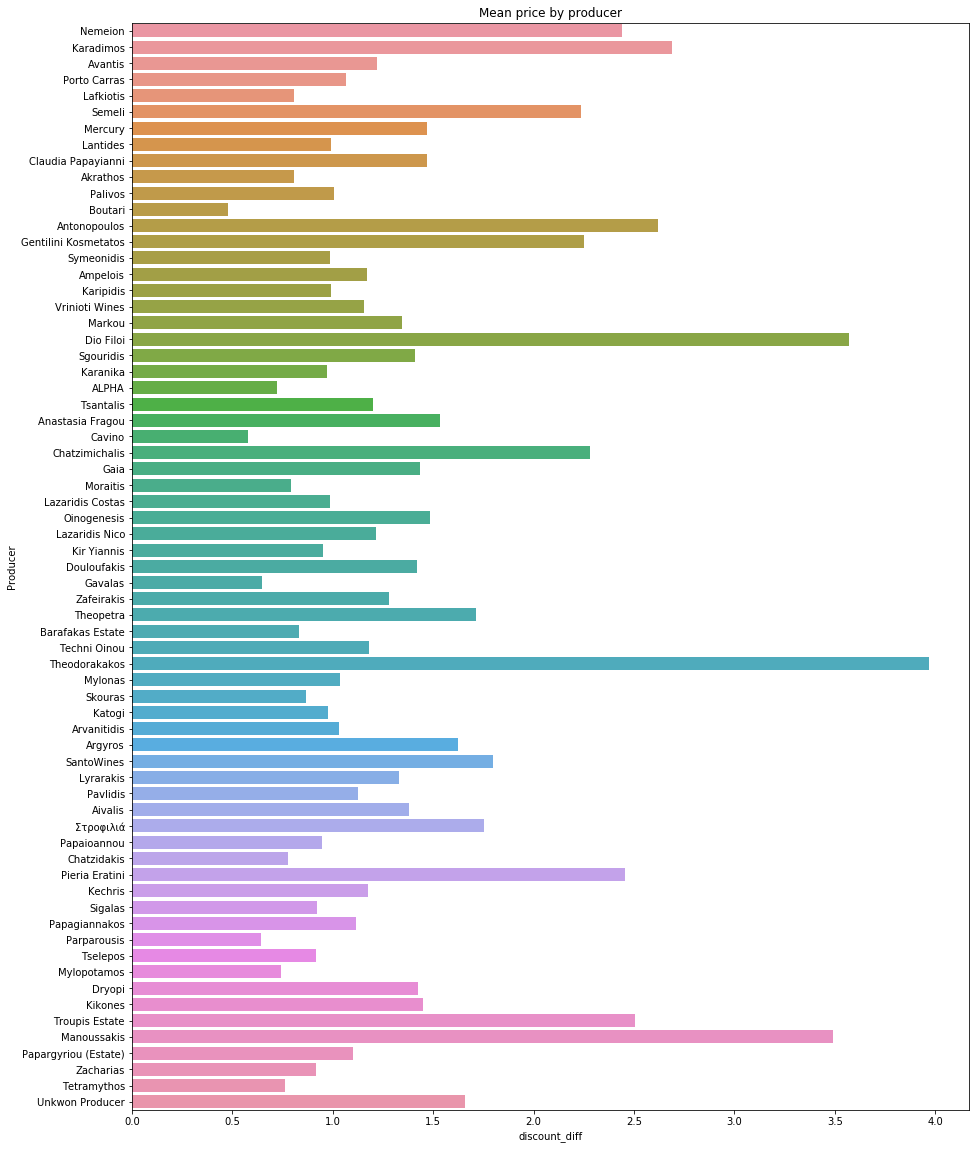

In [53]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['producer']).discount_diff.mean(),y=wines_df.producer.unique() ,orient='h')
plt.title("Mean discount by producer")
plt.ylabel("Producer");

En la figura anterior podemos obsevar el descuento promedio por cada uno de los productores de vinos 
siendo Theodorakakus con mayor descuento entre los productores de vino 


## Descuento promedio por país de origen

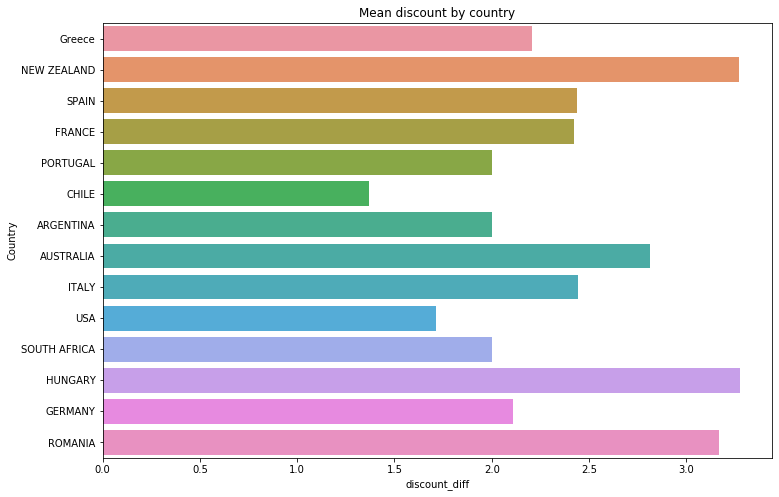

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x=wines_df.groupby(['country']).discount_diff.mean(),y=wines_df.country.unique() ,orient='h')

plt.title("Mean discount by country",)
plt.ylabel("Country");


En la figura anterior se puede observar el descuento promedio por país de origen de cada vino 
Se deduce que aquellos vinos procedentes de Hungria, Romania y Nueva Zelanda son aquellos que tiene mayor descuento 
Mientras que aquellos vinos procedecentes de Chile tienen menor descuento en los precios

## Porcentaje de Alcohol por país de origen


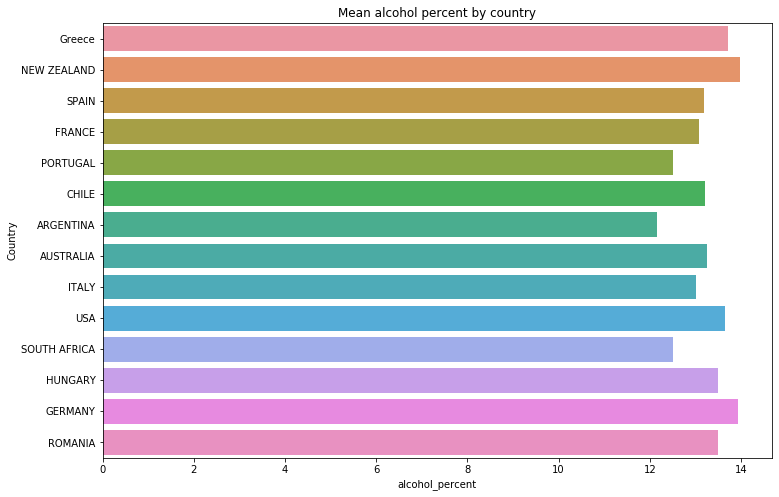

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x=wines_df.groupby(['country']).alcohol_percent.mean(),y=wines_df.country.unique() ,orient='h')
plt.title("Mean alcohol percent by country")
plt.ylabel("Country");

En la figura anterior se puede observar que todos los vinos de los diferentes paises tiene un promedio de 
alcohol entre 12 y 14 %

## Precio promedio por País de origen

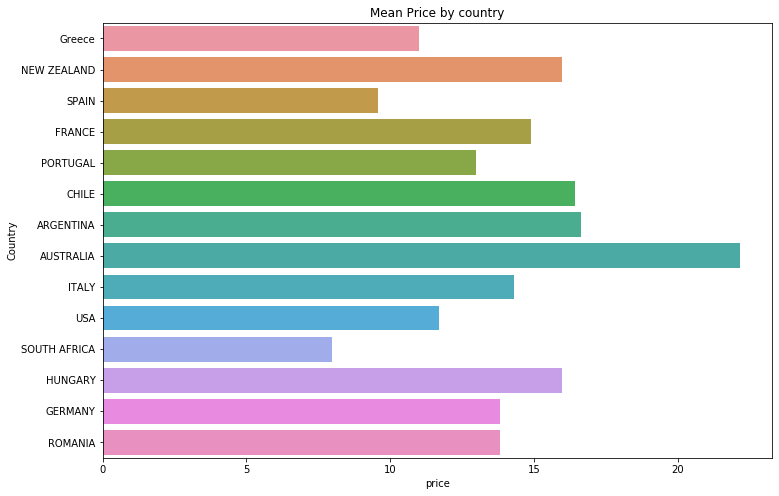

In [142]:
plt.figure(figsize=(12,8))
sns.barplot(x=wines_df.groupby(['country']).price.mean(),y=wines_df.country.unique() ,orient='h')

plt.title("Mean Price by country",)
plt.ylabel("Country");

En la figura anterior se puede observar como varia el precio de los vinos por cada país, se observa que aquellos
vinos procedentes de Austrailia tiene un precio mayor. En cambio, los vinos procedentes de South Africa tiene precio mas bajo 

## Promedio de alcohol por tipo de vino 

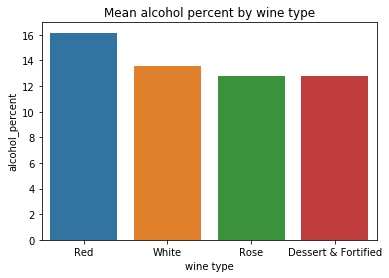

In [80]:
#plt.figure(figsize=(4,6))
sns.barplot(x=wines_df.wine_color.unique(),y=  wines_df.groupby(['wine_color']).alcohol_percent.mean())
plt.title("Mean alcohol percent by wine type")
plt.xlabel("wine type");


De la imagen anterior se deduce que aquellos vinos de color rojo (Red) tienen mayor porcentaje de alcohol con un promedio de 16 %B

## Promedio de precio por tipo de vino 

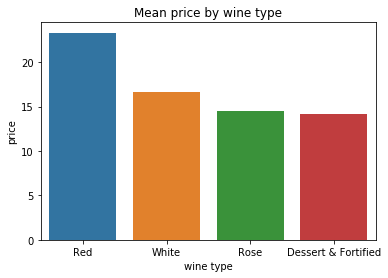

In [81]:
#plt.figure(figsize=(4,6))
sns.barplot(x=wines_df.wine_color.unique(),y=  wines_df.groupby(['wine_color']).price.mean())
plt.title("Mean price by wine type")
plt.xlabel("wine type");


De la figura anterior podemos obaserver el promedio de precio por cada tipo de vino 
podemos observer el vino Rojo es el de mayor precio 

## Promedio de descuento entre los tipos de vino 

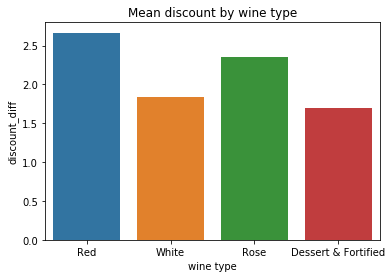

In [82]:
#plt.figure(figsize=(4,6))
sns.barplot(x=wines_df.wine_color.unique(),y=  wines_df.groupby(['wine_color']).discount_diff.mean())
plt.title("Mean discount by wine type")
plt.xlabel("wine type");


De lo anterior se deduce que el vino rojo tiene mayor descuento en comparación con los demás tipos de vinos 


## Promedio del Precio de los vinos dependiendo de año de cosecha


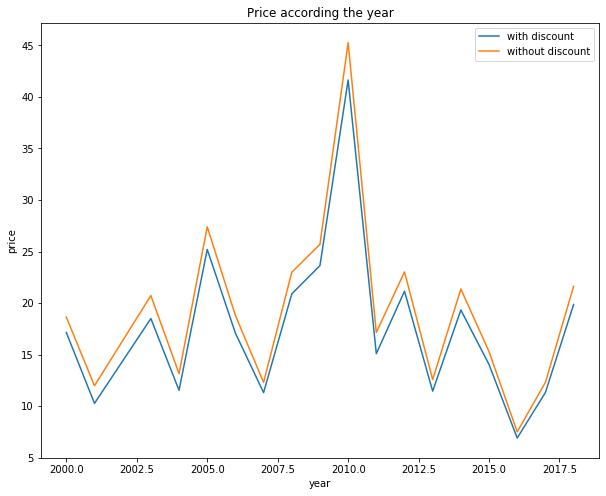

In [127]:
plt.figure(figsize=(10,8))
sns.lineplot(x=wines_df.year.unique(),y=  wines_df.groupby(['year']).discount_price.mean(),label='with discount')
sns.lineplot(x=wines_df.year.unique(),y=  wines_df.groupby(['year']).price.mean(),label='without discount')
plt.title("Price according the year")
plt.xlabel("year");

De la figura anteiror se puede deducir que los vinos cuya cosecha data entre 2007-2010 crecio en precio. Debido a 
que existe un máximo entre estos puntos. Sin embargo, se nota una caida de los precios para las cosechas posteriores al 2010

## Promedio del Precio de los vinos dependiendo de año de cosecha para Grecia

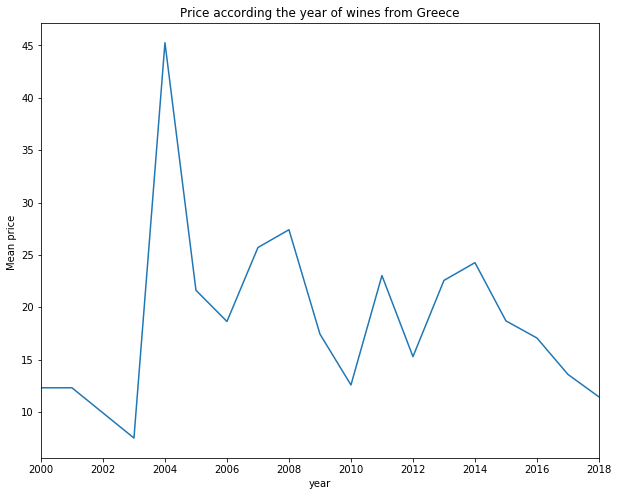

In [132]:
wines_df.loc[wines_df.country=='Greece'].groupby(["year"]).price.mean().plot(kind='line',figsize=(10,8),rot=0)
plt.ylabel('Mean price '); 
plt.title("Price according the year of wines from Greece")
plt.xlabel("year");


De la figura anterior se puede observar que los vinos de la cosecha del 2004 tiene un promedio de precio mucho mayor que las demás cosechas.

## Precio dependiendo de los años de cosecha para cada tipo de vino 

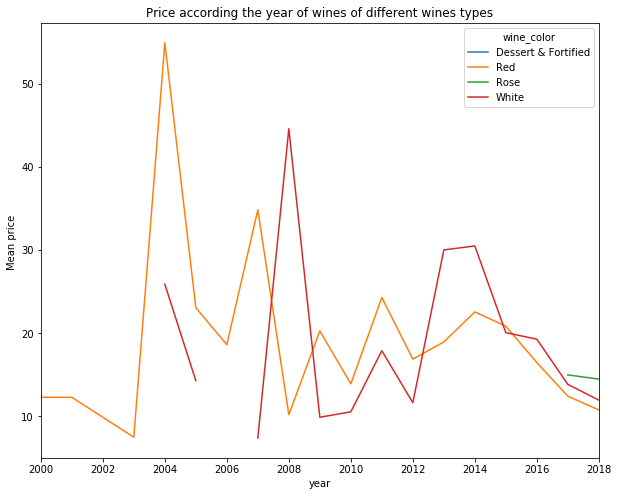

In [136]:
wines_df.groupby(["year","wine_color"]).price.mean().unstack().plot(kind='line',figsize=(10,8),rot=0)
plt.ylabel('Mean price '); 
plt.title("Price according the year of wines of different wines types")
plt.xlabel("year"); 



En la figura anterior se peude observar como han variado los precios de cada tipo de vino dependiendo 
del año de cosecha

## Porcentaje de Alcohol dependiendo del año de la cosecha 


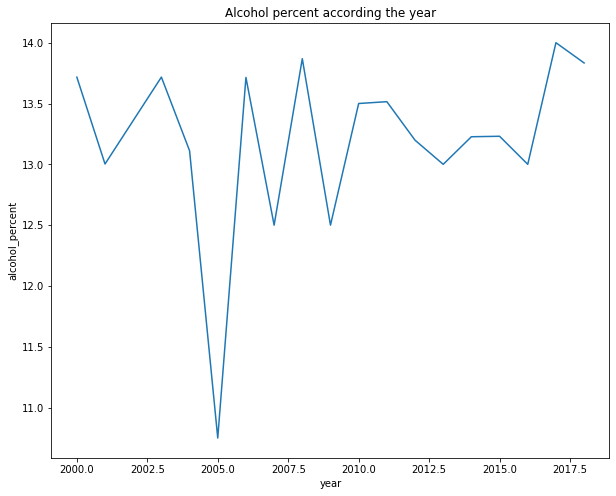

In [144]:
plt.figure(figsize=(10,8))
sns.lineplot(x=wines_df.year.unique(),y=  wines_df.groupby(['year']).alcohol_percent.mean())
plt.title("Alcohol percent according the year")
plt.xlabel("year");

En la figura anterior se observa como ha variado el porcentaje de alcohol dependiendo del año de la cosecha.
 Se observa que para los vinos de la cosecha del año 2005 se obtuvo un porcentaje de alcohol bastante bajo 

## Promedio de precio por tipo de vinos por país 

<Figure size 1440x1080 with 0 Axes>

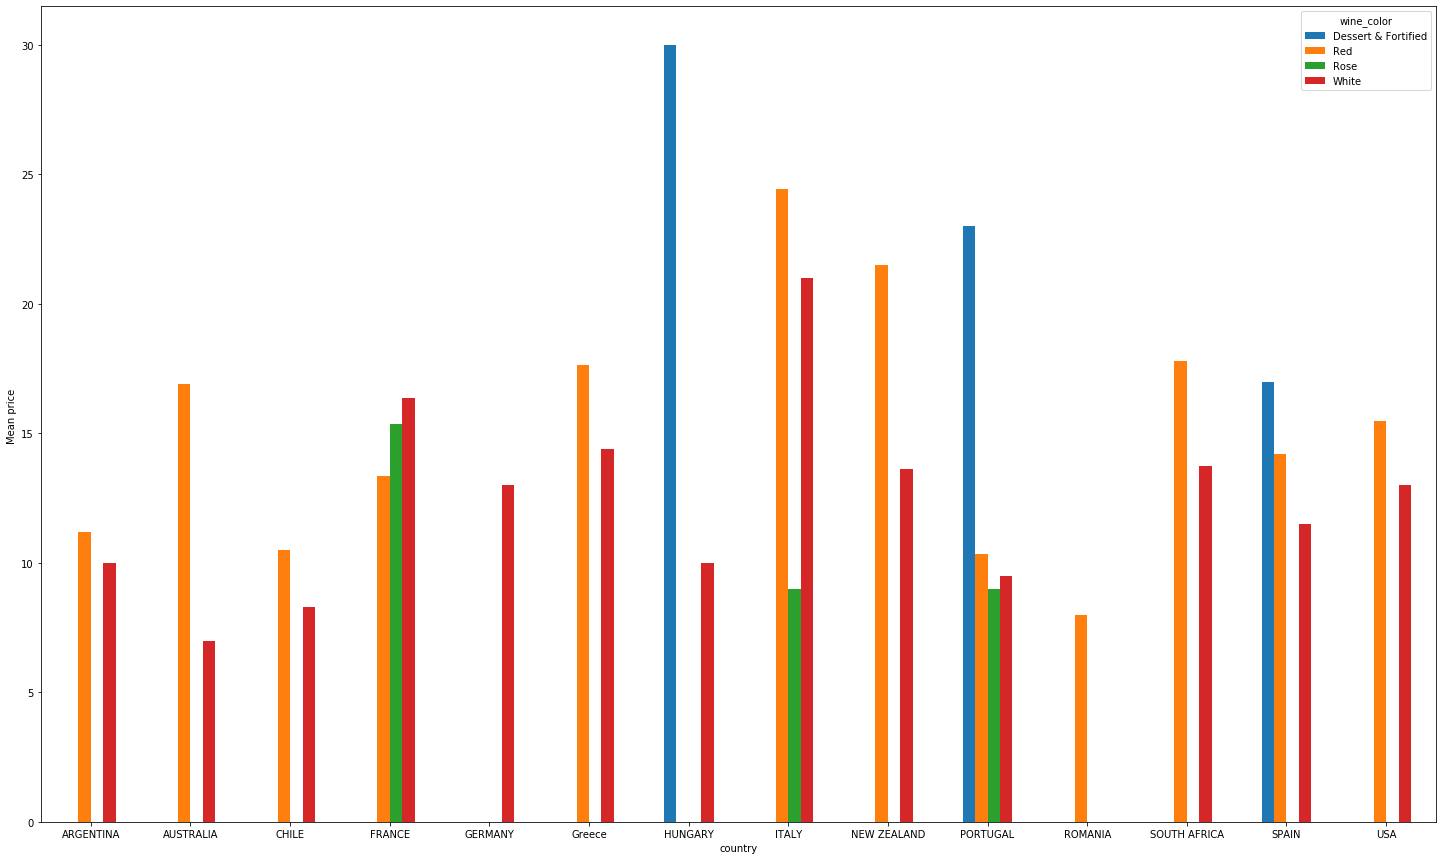

In [108]:

wines_df.groupby(["country","wine_color"]).price.mean().unstack().plot(kind='bar',figsize=(25,15),rot=0)
plt.ylabel('Mean price '); 


En la figura anterior se puede observar el promedio de precio por vino procedente de cada país.
Por ejemplo el vino Dessert & Fortified procedente de Hungria es en promedio más caro que los vinos del mismo tipo procedentes de Portugal y España 

## promedio de descuento por tipo de vino de procedencia 

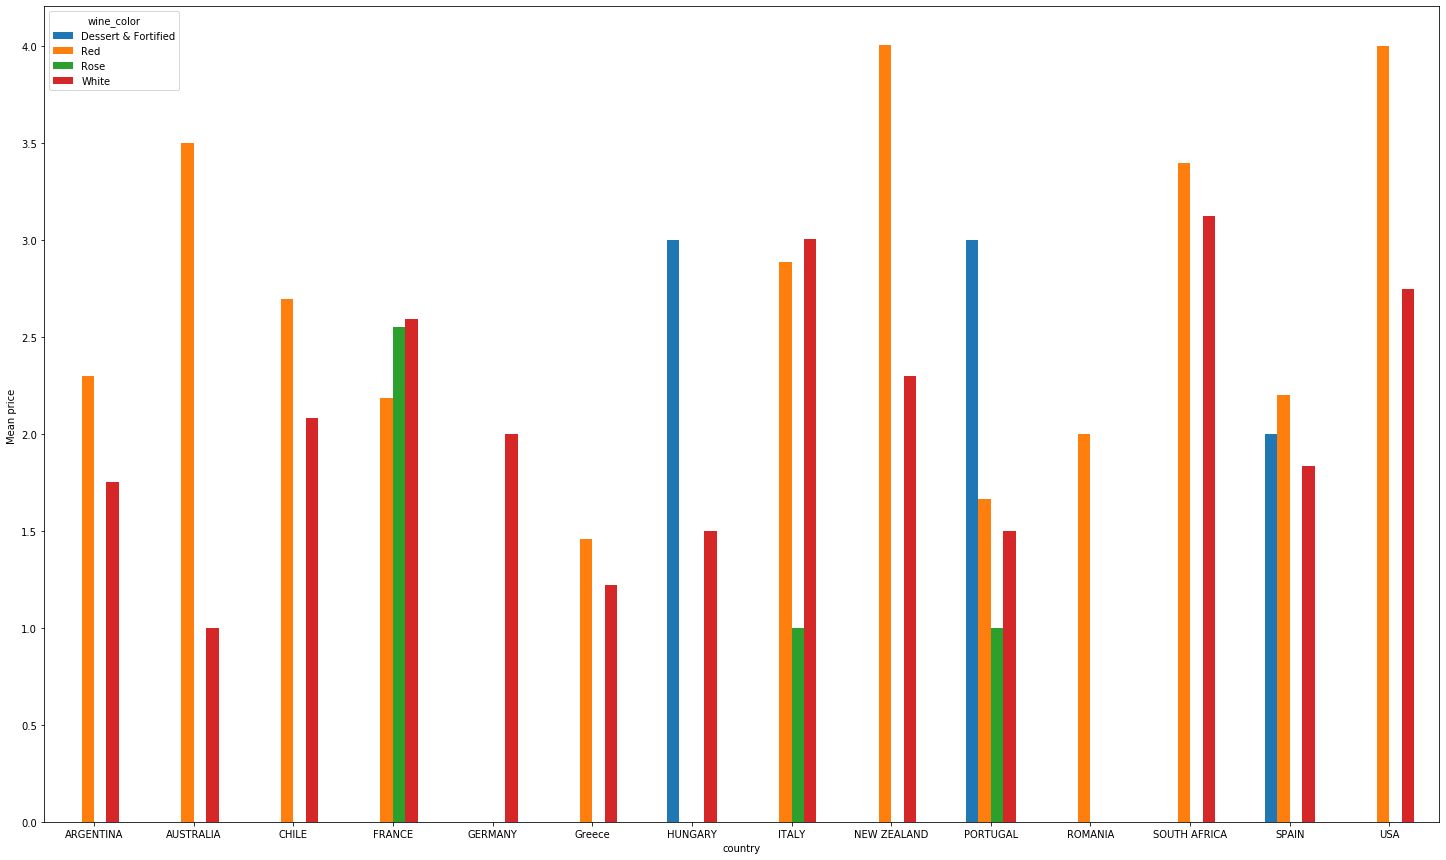

In [112]:
wines_df.groupby(["country","wine_color"]).discount_diff.mean().unstack().plot(kind='bar',figsize=(25,15),rot=0)
plt.ylabel('Mean price '); 


De lo anterior se puede deducir que dependiendo de la procedencia del vino y su tipo existe diferentes descuentos 
Por ejemplo, el vino rojo procedente de Usa tiene mayor descuento que los procedentes de otros paises 

## Promedio de porcentaje de alcohol del tipo de vino dependiendo de cada País 


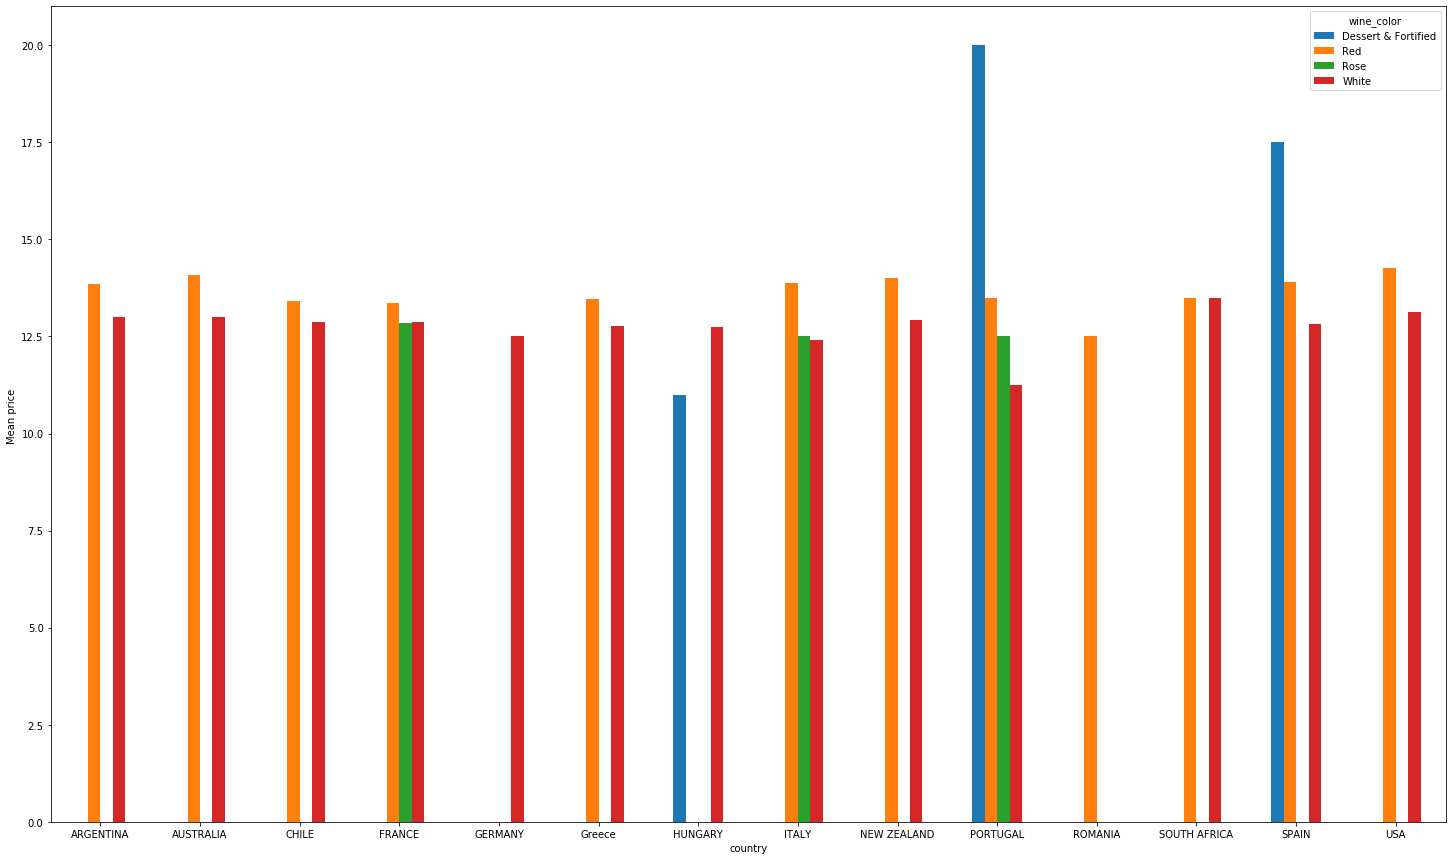

In [133]:
wines_df.groupby(["country","wine_color"]).alcohol_percent.mean().unstack().plot(kind='bar',figsize=(25,15),rot=0)
plt.ylabel('Mean price '); 

Se observa que denpendiendo de la procedencia del vino se tiene que casi no varia en su contenido de alcohol en casi todo, con excepción de Dessert & Fortified el cual si presenta una variación en el porcentaje de alcohol dependiendo si es origen de España, Portugal o Hungria 

## Relación entre el precio y  el porcentaje de alcohol agrupado por tipo de vino 

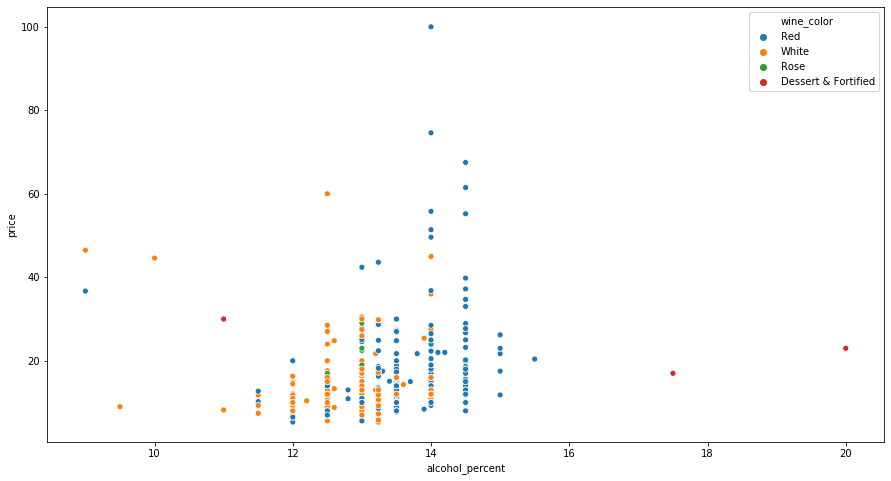

In [153]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='alcohol_percent',y='price',data=wines_df,hue='wine_color'); 

De lo anterior se puede deducir que el vino Rojo es el en cuanto su porcentaje de alcohol crece su precio en crece.

## Relación entre el precio y  el porcentaje de alcohol agrupado por País 

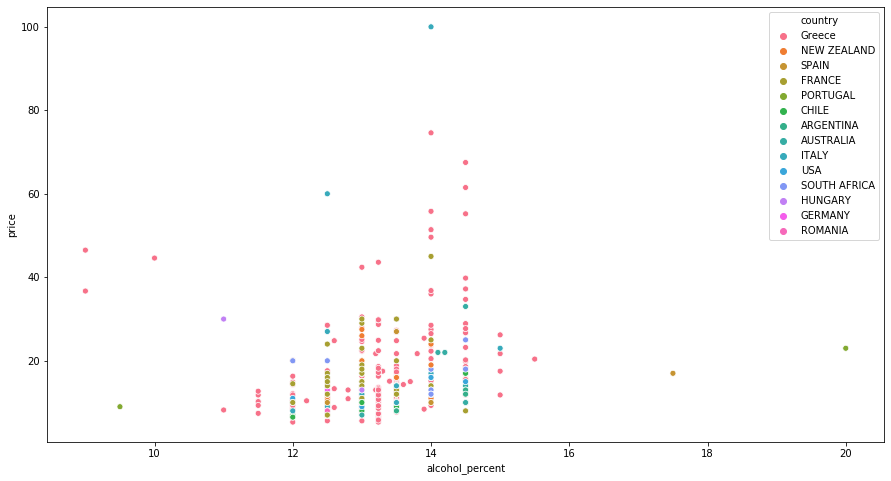

In [157]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='alcohol_percent',y='price',data=wines_df,hue='country'); 

De la figura anterior se tiene que que los vinos procedentes de Rumania tienden a creacer su precio si el porcentaje de alcohol también crece

## Conclusion
Se tiene que los precios de cada uno de los vinos extraidos en las dos páginas incrementan o difieren en base a las 
variables de país, año de cosecha, porcentaje de alcohol, tipo de variedad de uva.